<a href="https://colab.research.google.com/github/akrautsky/ml-bootcamp/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits

In [9]:
X = load_digits().data
y = load_digits().target

In [12]:
# normalize the data
X = X/16.

In [13]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

In [15]:
X_train[0].shape

(64,)

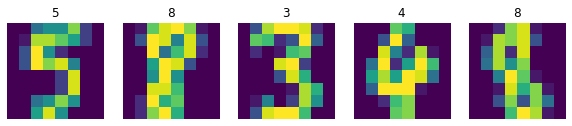

In [17]:
# lets plot some random values here
import matplotlib.pyplot as plt
import numpy as np
import random

plt.figure(figsize=(10,10))

for i in range(5):
  random_index = np.random.choice(np.arange(len(X_train)))
  plt.subplot(1, 5, i+1)
  plt.imshow(X_train[random_index].reshape(8,8))
  plt.axis(False)
  plt.grid(True)
  plt.title(y_train[random_index])

plt.plot();



In [27]:
import time
from sklearn.metrics import accuracy_score

In [25]:
# Use Random forest tree to classify these digits and time it with original diamentions
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=20, bootstrap=True, n_jobs=-1)


In [26]:
%time
forest_clf.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


RandomForestClassifier(n_estimators=20, n_jobs=-1)

In [28]:
# evaluate it on test data
forest_preds = forest_clf.predict(X_test)
forest_preds[:3]

array([6, 9, 3])

In [29]:
forest_acc_score = accuracy_score(y_test, forest_preds)
forest_acc_score

0.9666666666666667

In [30]:
# so with original data, retaining all the features our random forest model works really good to get 97% accuracy

#### PCA to reduce diamentions

In [31]:
from sklearn.decomposition import PCA
#with explained variance ration of 95%
pca = PCA( n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)


In [32]:
# check the diamentions for the new data
X_train.shape, X_train_reduced.shape

((1437, 64), (1437, 28))

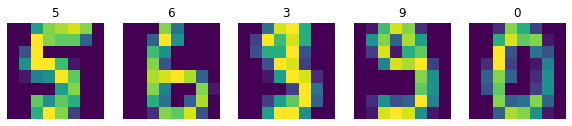

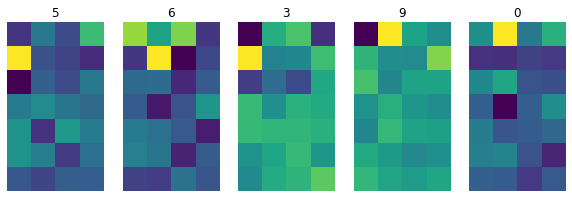

In [46]:
# PCA reduced the diamentions from 64 to 28 only
# Lets plot some images with original and reduced dataset to see the differenece
random_idx = np.random.choice(np.arange(len(X_train)), size=5)

plt.figure(figsize=(10,10))

for idx, r_idx in enumerate(random_idx):
  plt.subplot(1, 5, idx+1)
  plt.imshow(X_train[r_idx].reshape(8, 8))
  plt.axis(False)
  plt.grid(True)
  plt.title(y_train[r_idx])
plt.show()

plt.figure(figsize=(10,10))
for idx, r_idx in enumerate(random_idx):
  plt.subplot(1, 5, idx+1)
  plt.imshow(X_train_reduced[r_idx].reshape(7, 4))
  plt.axis(False)
  plt.grid(True)
  plt.title(y_train[r_idx])
plt.show()


In [47]:
# as we can see, the PCA reduced the number of features and its very hard to interprets new dataset now

In [49]:
# lets run the RandomForestClassifier on new reduced dataset
forest_clf_reduced = RandomForestClassifier(n_estimators=20, bootstrap=True, n_jobs=-1)
%time
forest_clf_reduced.fit(X_train_reduced, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


RandomForestClassifier(n_estimators=20, n_jobs=-1)

In [51]:
# evaluate the model
X_test_reduced = pca.transform(X_test)
forest_preds_reduced = forest_clf_reduced.predict(X_test_reduced)
acc_score_reduced = accuracy_score(y_test, forest_preds_reduced)
acc_score_reduced

0.95

In [52]:
# so the model on original data outperform the pca not with major margin

#### t-SNE

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE() # reduced the data to default 2 diamentions
X_train_tsne = tsne.fit_transform(X_train)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [54]:
X_train_tsne.shape

(1437, 2)

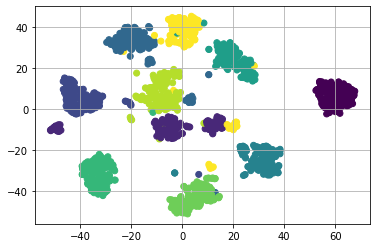

In [60]:
# lets plot the new dataset to see if it sepates the classes
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train)
plt.xticks(ticks= None )
plt.grid(True)
plt.show()

In [61]:
# lets run forest with new data from tsne
forest_clf_sne = RandomForestClassifier(n_estimators=20, bootstrap=True, n_jobs=-1)
%time
forest_clf_sne.fit(X_train_tsne, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


RandomForestClassifier(n_estimators=20, n_jobs=-1)